In [1]:
import pywt
import torch
import numpy as np
from models import get_model
from torchview import draw_graph

In [2]:
x = np.random.randn(1, 1, 256, 256).astype(np.float32)
print(x.dtype)
x1, _ = pywt.dwt2(x, 'db1')
x2, _ = pywt.dwt2(x1, 'db1')
x3, _ = pywt.dwt2(x2, 'db1')
x4, _ = pywt.dwt2(x3, 'db1')

float32


In [3]:
x = torch.from_numpy(x)
print(x.dtype)
x1 = torch.from_numpy(x1)
x2 = torch.from_numpy(x2)
x3 = torch.from_numpy(x3)
x4 = torch.from_numpy(x4)

torch.float32


In [4]:
# Simulate input data with wavelet decomposition
input_data = [(x, x1, x2, x3, x4)]

ResNetEncoderBasicBlock:  65 65
Basic block:  65
Basic block:  65
ResNetEncoderBasicBlock:  66 130
Basic block:  66
Basic block:  130
ResNetEncoderBasicBlock:  131 259
Basic block:  131
Basic block:  259
ResNetEncoderBasicBlock:  260 516
Basic block:  260
Basic block:  516
Base encoder block forward: 1
Wavelets mode level: 2
x:  torch.Size([1, 64, 128, 128])
w:  torch.Size([1, 1, 128, 128])
cat:  torch.Size([1, 65, 128, 128])
Pool block, pool_mode=1:  torch.Size([1, 65, 128, 128])
Pool block, pool_mode=1:  torch.Size([1, 65, 64, 64])
Basic block forward: 
x:  torch.Size([1, 65, 64, 64]) 65
Conv2d(65, 65, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
x1 conv1:  torch.Size([1, 65, 64, 64])
x1 bn1:  torch.Size([1, 65, 64, 64])
x1 relu:  torch.Size([1, 65, 64, 64])
x1 conv2:  torch.Size([1, 65, 64, 64])
x1 bn2:  torch.Size([1, 65, 64, 64])
no downsample
x1:  torch.Size([1, 65, 64, 64])
x:  torch.Size([1, 65, 64, 64])
Basic block forward: 
x:  torch.Size([1, 65, 64, 64]) 65

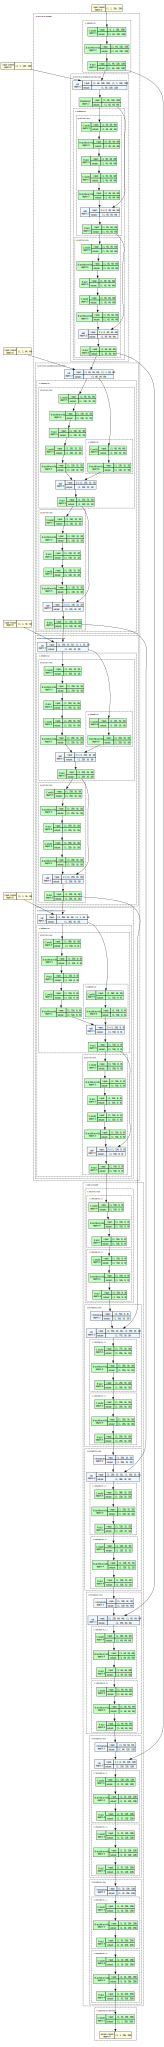

In [5]:
arch = 'unet'
encoder = 'resnet18'
parameters = {"in_channels": 1, "out_channels": 1, "wavelets_mode": 2}
model = get_model(arch, parameters, encoder)
# We are using draw_graph to eval the model graph
model_graph = draw_graph(
    model,
    input_data = input_data,
    #input_size=(1, 1, 256, 256),
    depth=7,
    show_shapes=True,
    expand_nested=True,
    save_graph=True,
    filename=f"{arch}-{encoder}",
    directory="figures",
)
model_graph.visual_graph